# Contents:

I. [Loading the Data:](#Loading-the-Data:)

II. [Helper function to calculate prediction interval:](#Helper-function-to-calculate-prediction-interval:)

III. [Models:](#Models:)

* [Linear Regression:](#Linear-Regression:)

* [Ridge Regression:](#Ridge-Regression:-(L2-Regularization))

* [Lasso Regression:](#Lasso-Regression:-(L1-Regularization))

* [Ensemble:](#Ensemble:)

IV. [Saving the final trained model:](#Saving-the-final-trained-model:)

## Loading the Data:

([Contents:](#Contents:))

In [5]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time 
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('../data/real_estate_model_ready.csv')
print(df.shape)
df.head()

(199, 33)


,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned,Price by sub-area,Amenities score,Price by Amenities score,Noun_Counts,Verb_Counts,Adjective_Counts,boasts elegant,elegant towers,every day,great community,mantra gold,offering bedroom,quality specification,stories offering,towers stories,world class
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located suburbs ba...,1,1,1,1,1,1,1,670.0,51.5,62.897000,7,74.75,9,1,3,0,0,0,0,0,0,0,0,0,0
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near lonavala hill ran...,1,1,1,1,1,1,1,774.0,65.0,62.897000,7,74.75,9,1,3,0,0,0,0,0,0,0,0,0,0
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society suitable aged group people play...,1,1,1,1,1,1,1,889.0,74.0,62.897000,7,74.75,9,1,3,0,0,0,0,0,0,0,0,0,0
3,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha township offering bhk grand prpoerties ...,1,1,1,1,1,1,1,1018.0,89.0,62.897000,7,74.75,8,1,3,0,0,0,0,0,0,0,0,0,0
4,pune,maharashtra,india,2.0,mahalunge,godrej properties,godrej hills retreat,area hub prestigious schools like bishop high ...,1,1,1,1,1,1,1,743.0,74.0,74.833333,7,74.75,12,1,6,0,0,0,0,0,0,0,0,0,0


In [7]:
# Selecting only numerical features
cols_to_drop = ['City','State','Country','Sub-Area Cleaned','TownShip Name/ Society Name Cleaned',
                'Description Cleaned','Company Name Cleaned']

features = df.drop(cols_to_drop,axis=1).columns.tolist()
print("Final number of features: "+str(len(features)))

Final number of features: 26


In [8]:
features

['Property Type Cleaned',
 'ClubHouse Cleaned',
 'School / University in Township Cleaned',
 'Hospital in TownShip Cleaned',
 'Mall in TownShip Cleaned',
 'Park / Jogging track Cleaned',
 'Swimming Pool Cleaned',
 'Gym Cleaned',
 'Property Area in Sq. Ft. Cleaned',
 'Price in lakhs Cleaned',
 'Price by sub-area',
 'Amenities score',
 'Price by Amenities score',
 'Noun_Counts',
 'Verb_Counts',
 'Adjective_Counts',
 'boasts elegant',
 'elegant towers',
 'every day',
 'great community',
 'mantra gold',
 'offering bedroom',
 'quality specification',
 'stories offering',
 'towers stories',
 'world class']

In [9]:
featuresMod = ['PropertyType',
                'ClubHouse',
                'School_University_in_Township',
                'Hospital_in_TownShip',
                'Mall_in_TownShip',
                'Park_Jogging_track',
                'Swimming_Pool',
                'Gym',
                'Property_Area_in_Sq_Ft',
                'Price_in_lakhs',
                'Price_by_sub_area',
                'Amenities_score',
                'Price_by_Amenities_score',
                'Noun_Counts',
                'Verb_Counts',
                'Adjective_Counts',
                'boasts_elegant',
                'elegant_towers',
                'every_day',
                'great_community',
                'mantra_gold',
                'offering_bedroom',
                'quality_specification',
                'stories_offering',
                'towers_stories',
                'world_class']
print(len(featuresMod))

26


In [10]:
dict(zip(features,featuresMod))

{'Property Type Cleaned': 'PropertyType',
 'ClubHouse Cleaned': 'ClubHouse',
 'School / University in Township Cleaned': 'School_University_in_Township',
 'Hospital in TownShip Cleaned': 'Hospital_in_TownShip',
 'Mall in TownShip Cleaned': 'Mall_in_TownShip',
 'Park / Jogging track Cleaned': 'Park_Jogging_track',
 'Swimming Pool Cleaned': 'Swimming_Pool',
 'Gym Cleaned': 'Gym',
 'Property Area in Sq. Ft. Cleaned': 'Property_Area_in_Sq_Ft',
 'Price in lakhs Cleaned': 'Price_in_lakhs',
 'Price by sub-area': 'Price_by_sub_area',
 'Amenities score': 'Amenities_score',
 'Price by Amenities score': 'Price_by_Amenities_score',
 'Noun_Counts': 'Noun_Counts',
 'Verb_Counts': 'Verb_Counts',
 'Adjective_Counts': 'Adjective_Counts',
 'boasts elegant': 'boasts_elegant',
 'elegant towers': 'elegant_towers',
 'every day': 'every_day',
 'great community': 'great_community',
 'mantra gold': 'mantra_gold',
 'offering bedroom': 'offering_bedroom',
 'quality specification': 'quality_specification',
 'stor

In [11]:
# import pickle
# fileName = '../model/raw_features_mapping.pkl'

# with open(fileName, 'wb') as f:
#     pickle.dump(dict(zip(features,featuresMod)),f)

In [12]:
# import pickle
# fileName = '../model/features.pkl'

# with open(fileName, 'wb') as f:
#     pickle.dump(featuresMod,f)

In [9]:
# df.rename(columns=dict(zip(features,featuresMod)))

In [13]:
df_features = df[features]
df_features.columns = featuresMod
print(df_features.shape)
df_features.head()

(199, 26)


,PropertyType,ClubHouse,School_University_in_Township,Hospital_in_TownShip,Mall_in_TownShip,Park_Jogging_track,Swimming_Pool,Gym,Property_Area_in_Sq_Ft,Price_in_lakhs,Price_by_sub_area,Amenities_score,Price_by_Amenities_score,Noun_Counts,Verb_Counts,Adjective_Counts,boasts_elegant,elegant_towers,every_day,great_community,mantra_gold,offering_bedroom,quality_specification,stories_offering,towers_stories,world_class
0,1.0,1,1,1,1,1,1,1,670.0,51.5,62.897000,7,74.75,9,1,3,0,0,0,0,0,0,0,0,0,0
1,2.0,1,1,1,1,1,1,1,774.0,65.0,62.897000,7,74.75,9,1,3,0,0,0,0,0,0,0,0,0,0
2,3.0,1,1,1,1,1,1,1,889.0,74.0,62.897000,7,74.75,9,1,3,0,0,0,0,0,0,0,0,0,0
3,3.0,1,1,1,1,1,1,1,1018.0,89.0,62.897000,7,74.75,8,1,3,0,0,0,0,0,0,0,0,0,0
4,2.0,1,1,1,1,1,1,1,743.0,74.0,74.833333,7,74.75,12,1,6,0,0,0,0,0,0,0,0,0,0


In [14]:
# IDV and DV
X = df_features.drop('Price_in_lakhs',axis=1)
y = df_features[['Price_in_lakhs']]

print(X.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)
print((x_train.shape, x_test.shape), (y_train.shape,y_test.shape))

(199, 25)
(199, 1)
((139, 25), (60, 25)) ((139, 1), (60, 1))


## Helper function to calculate prediction interval:

([Contents:](#Contents:))

##### Prediction/confidence Interval:

In statistical inference, specifically predictive inference, a prediction interval is an estimate of an interval in which a future observation will fall, with a certain probability, given what has already been observed.

After you fit a regression model that provides an adequate fit to the data, you can use the model to generate predictions based on specific predictor values. However, predictions are not as simple as a single predicted value. The predicted value is actually the mean response value. Like any mean, there is variability around that mean.

Prediction intervals account for the variability around the mean response inherent in any prediction. Like confidence intervals, predictions intervals have a confidence level and can be a two-sided range, or an upper or lower bound. Unlike confidence intervals, prediction intervals predict the spread for individual observations rather than the mean.

Note that a prediction interval is different than a confidence interval of the prediction. The prediction interval is always wider than the confidence interval of the prediction because of the added uncertainty involved in predicting a single response versus the mean response.

**Formula for calculating CI/PI:**
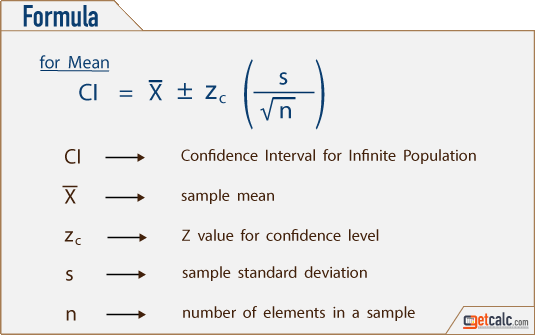

**Z-value:**
The Z value is the number of standard deviations above or below the mean a value is. For example, a Z score of -2.2 means the value is 2.2 standard deviations below the mean. A Z score of 1.2 means the value is 1.2 standard deviations above the mean.
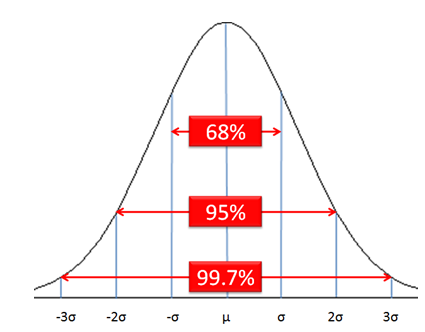

**Z-value for 95% CI:**
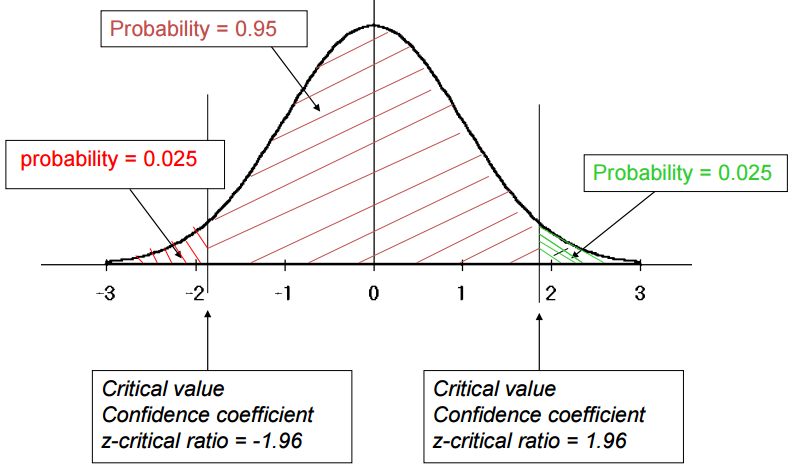

**Example:**
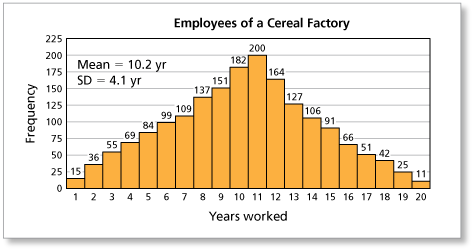

Steps to calculate the prediction interval:
1. Train the ML model and get prediction on the training dataset
2. Calculate the Standard Deviation of the actual and predicted values in the training data
3. Calculate the "Standard Deviation Multiplier" for the confidence level we need (z-score)
4. Calculate the interval estimate
5. Finally for each prediction, **(pred - interval_estimate)** gives the lower bound and **(pred + interval_estimate)** gives the upper bound of the prediction

In [27]:
pi=0.9975
one_minus_pi = 1 - pi
ppf_lookup = 1 - (one_minus_pi / 2) # If we need to calculate a 'Two-tail test' (i.e. We're concerned with values both greater and less than our mean) then we need to split the significance (i.e. our alpha value) because we're still using a calculation method for one-tail. The split in half symbolizes the significance level being appropriated to both tails. A 95% significance level has a 5% alpha; splitting the 5% alpha across both tails returns 2.5%. Taking 2.5% from 100% returns 97.5% as an input for the significance level.
z_score = stats.norm.ppf(ppf_lookup) # This will return a value (that functions as a 'standard-deviation multiplier') marking where 95% (pi%) of data points would be contained if our data is a normal distribution.
z_score

3.023341439739154

In [28]:
def get_interval_estimate(actual_values, predicted_values, pi=.95):
    '''
    Get the interval estimate for the regression model.
    
    INPUTS: 
        - actual_values (y_train)
        - predicted_values (prediction from x_train)
        - Prediction interval threshold (default = .95) 
    OUTPUT: 
        - Interval estimate
    '''
    
    #get standard deviation of prediction on the train dataset
    sum_errs = np.sum((actual_values - predicted_values)**2)
    stdev = np.sqrt(sum_errs / (len(actual_values) - 1))
    
    #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2) # If we need to calculate a 'Two-tail test' (i.e. We're concerned with values both greater and less than our mean) then we need to split the significance (i.e. our alpha value) because we're still using a calculation method for one-tail. The split in half symbolizes the significance level being appropriated to both tails. A 95% significance level has a 5% alpha; splitting the 5% alpha across both tails returns 2.5%. Taking 2.5% from 100% returns 97.5% as an input for the significance level.
    z_score = stats.norm.ppf(ppf_lookup) # This will return a value (that functions as a 'standard-deviation multiplier') marking where 95% (pi%) of data points would be contained if our data is a normal distribution.
    interval = z_score * stdev

    return interval


def get_prediction_interval(prediction, actual_values, predicted_values, pi=.95):
    '''
    Get a prediction interval for the regression model.
    
    INPUTS: 
        - Single prediction (test data), 
        - y_train
        - prediction from x_train,
        - Prediction interval threshold (default = .95) 
    OUTPUT: 
        - Prediction interval for single test prediction
    '''
    
    #get standard deviation of prediction on the train dataset
    sum_errs = np.sum((actual_values - predicted_values)**2)
    stdev = np.sqrt(sum_errs / (len(actual_values) - 1))
    
    #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2) # If we need to calculate a 'Two-tail test' (i.e. We're concerned with values both greater and less than our mean) then we need to split the significance (i.e. our alpha value) because we're still using a calculation method for one-tail. The split in half symbolizes the significance level being appropriated to both tails. A 95% significance level has a 5% alpha; splitting the 5% alpha across both tails returns 2.5%. Taking 2.5% from 100% returns 97.5% as an input for the significance level.
    z_score = stats.norm.ppf(ppf_lookup) # This will return a value (that functions as a 'standard-deviation multiplier') marking where 95% (pi%) of data points would be contained if our data is a normal distribution.
    interval = z_score * stdev
    
    
    #generate prediction interval lower and upper bound cs_24
    lower, upper = prediction - interval, prediction + interval
    return lower[0], upper[0]

## Models:

### Linear Regression:

([Contents:](#Contents:))

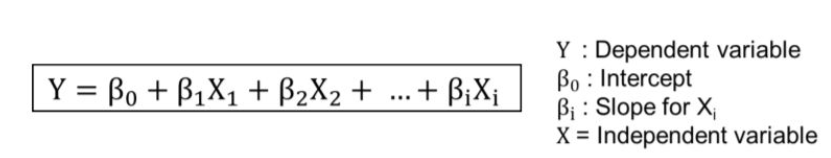

**Cost Function for LR:**
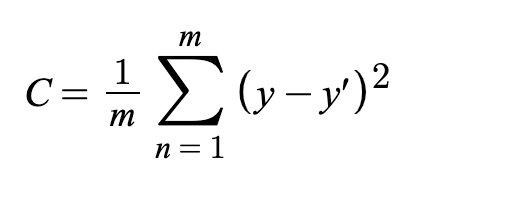

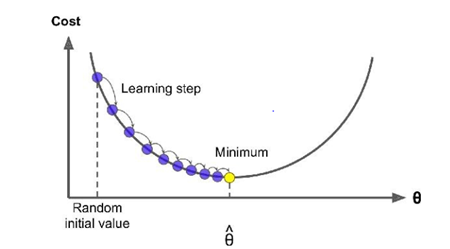

In [20]:
# Model training
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
print("Training R2 score: "+ str(linear_reg.score(x_train,y_train)))

Training R2 score: 0.8601049466092403


In [21]:
# Predicting on the test and evaluating the accuracy
preds_lr = linear_reg.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_lr)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_lr)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_lr))))

Test R2 score: 0.8918845502505847
Test MAE: 9.831982607144166
Test RMSE: 12.942632445045726


In [46]:
pd.DataFrame(zip(linear_reg.coef_.T, x_train.columns))

,0,1
0,[8.39430587743395],PropertyType
1,[-17.638636029365152],ClubHouse
2,[2.861903815572794],School_University_in_Township
3,[2.861903815572743],Hospital_in_TownShip
4,[2.8619038155727248],Mall_in_TownShip
5,[20.692799551276366],Park_Jogging_track
6,[-7.794021183242137],Swimming_Pool
7,[-1.6191857596361816],Gym
8,[0.08161779088209228],Property_Area_in_Sq_Ft
9,[0.4216031965347203],Price_by_sub_area


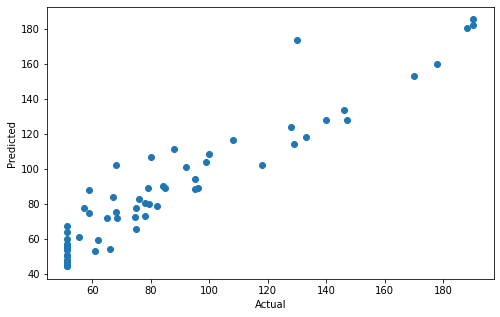

In [22]:
# Plotting the predicted and actual data 
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_lr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [23]:
x_test[:10]

,PropertyType,ClubHouse,School_University_in_Township,Hospital_in_TownShip,Mall_in_TownShip,Park_Jogging_track,Swimming_Pool,Gym,Property_Area_in_Sq_Ft,Price_by_sub_area,Amenities_score,Price_by_Amenities_score,Noun_Counts,Verb_Counts,Adjective_Counts,boasts_elegant,elegant_towers,every_day,great_community,mantra_gold,offering_bedroom,quality_specification,stories_offering,towers_stories,world_class
196,2.0,0,0,0,0,1,1,1,789.0,132.965000,3,71.552174,4,1,3,0,0,0,0,0,0,0,0,0,0
159,3.0,0,0,0,0,1,0,0,1038.0,81.750000,1,65.719048,12,1,6,0,0,0,0,0,0,0,0,0,1
31,3.0,1,0,0,0,1,0,1,1109.0,67.936250,3,71.552174,8,0,3,0,0,0,0,1,0,0,0,0,0
48,3.0,1,0,0,0,1,1,1,1182.0,109.666667,4,100.099691,11,0,3,1,1,0,1,0,1,1,1,1,0
63,2.5,1,0,0,0,1,1,0,936.0,69.665000,3,71.552174,10,2,4,0,0,0,0,0,0,0,0,0,0
59,3.0,0,0,0,0,1,0,0,917.0,76.387500,1,65.719048,8,0,3,1,1,0,1,0,1,1,1,1,0
5,3.0,1,1,1,1,1,1,1,975.0,74.833333,7,74.750000,5,3,2,0,0,0,0,0,0,0,0,0,0
7,3.0,1,0,0,0,1,1,1,1174.5,83.750000,4,100.099691,9,0,1,1,1,0,1,0,1,1,1,1,0
155,2.0,1,0,0,0,1,0,0,715.0,51.500000,2,84.414483,10,0,3,0,0,0,0,0,0,0,0,0,0
108,2.0,0,0,0,0,1,0,0,670.0,52.742727,1,65.719048,6,0,4,0,0,0,0,0,0,0,0,0,0


In [24]:
preds_lr[:10]

array([[ 94.17080552],
       [100.99941895],
       [ 82.63178691],
       [124.00741477],
       [ 65.71963691],
       [ 90.42541857],
       [ 88.43531882],
       [108.69952847],
       [ 50.21350084],
       [ 55.70478694]])

In [29]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_lr:
    lower, upper =  get_prediction_interval(i, y_train.values, linear_reg.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [30]:
print(lower_vet[:5])
print(upper_vet[:5])

[62.65044731122027, 69.47906073932216, 51.11142870182142, 92.48705655710125, 34.199278696278505]
[125.6911637314644, 132.5197771595663, 114.15214512206555, 155.5277729773454, 97.23999511652264]


In [31]:
preds_lr.reshape(-1)

array([ 94.17080552, 100.99941895,  82.63178691, 124.00741477,
        65.71963691,  90.42541857,  88.43531882, 108.69952847,
        50.21350084,  55.70478694,  83.80729815,  54.25417468,
       118.37076069, 173.30048505,  73.18946242,  44.29266532,
       103.70654727,  72.09595102,  50.93143992,  78.92439063,
        48.0534305 , 114.31721186,  74.75715439,  56.94041785,
       152.73588395,  53.79825942, 111.57055869, 133.42614299,
        47.13674172,  77.39886289,  77.45224114,  45.63960896,
        64.1645221 , 116.59733983,  75.20552358,  60.89128434,
       159.82242385, 182.05982469,  87.84821238,  59.2446386 ,
        72.52994352, 106.78605256,  55.01556345,  88.8206305 ,
        60.12039003,  44.72901446,  53.17237304, 101.92507344,
       127.73151917,  89.09906293,  80.34340933, 180.57744906,
        67.59911001,  46.40523442, 185.32786633, 102.33062832,
        80.08319482, 128.13073946,  72.2281903 ,  89.32994266])

In [32]:
df_lr = pd.DataFrame(zip(lower_vet,upper_vet,preds_lr.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_lr.shape)
df_lr.head()

(60, 3)


,lower,upper,mean
0,62.650447,125.691164,94.170806
1,69.479061,132.519777,100.999419
2,51.111429,114.152145,82.631787
3,92.487057,155.527773,124.007415
4,34.199279,97.239995,65.719637


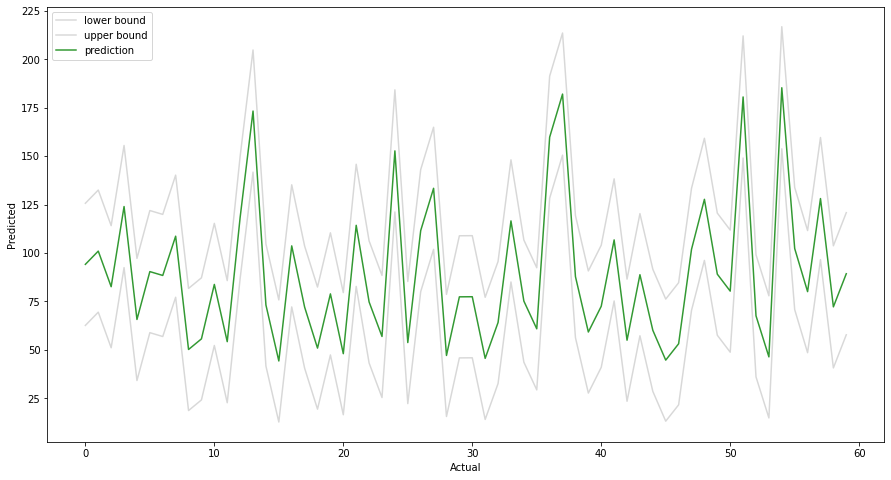

In [33]:
# Plotting the predicted and actual data 
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_lr,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

### Ridge Regression: (L2 Regularization)

([Contents:](#Contents:))

Ridge regression penalizes the model for the sum of squared value of the weights. Thus, the weights not only tend to have smaller absolute values, but also really tend to penalize the extremes of the weights, resulting in a group of weights that are more evenly distributed. The objective function becomes:

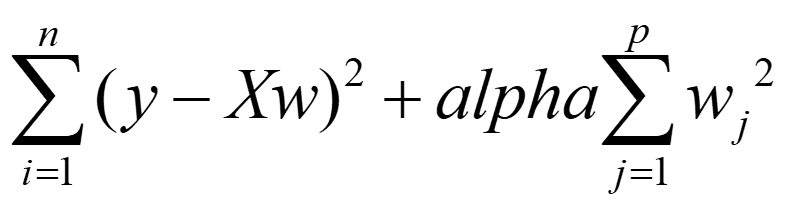

In [34]:
# Model training
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)
print("Training R2 score: "+ str(ridge.score(x_train,y_train)))

Training R2 score: 0.8589826704476355


In [35]:
# Predicting on the test and evaluating the accuracy
preds_rid = ridge.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_rid)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_rid)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_rid))))

Test R2 score: 0.8957756531572729
Test MAE: 9.611112958708553
Test RMSE: 12.70759395391315


In [45]:
pd.DataFrame(zip(ridge.coef_.T, x_train.columns))

,0,1
0,[8.174786446972146],PropertyType
1,[-15.077590647105222],ClubHouse
2,[3.8805602092092575],School_University_in_Township
3,[3.8805602092092695],Hospital_in_TownShip
4,[3.88056020920927],Mall_in_TownShip
5,[10.491940769457951],Park_Jogging_track
6,[-5.468511852314446],Swimming_Pool
7,[-0.8370475430186988],Gym
8,[0.08114315130928328],Property_Area_in_Sq_Ft
9,[0.4264163349539184],Price_by_sub_area


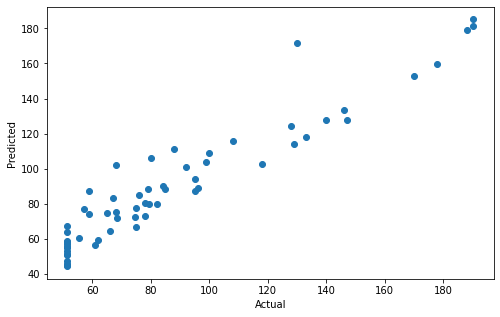

In [47]:
# Plotting the predicted and actual data 
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_rid)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [48]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_rid:
    lower, upper =  get_prediction_interval(i, y_train.values, ridge.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [49]:
print(lower_vet[:5])
print(upper_vet[:5])

[62.28917449500756, 69.2707627555649, 53.64123461103247, 92.56376842687632, 35.29863395156863]
[125.58225068685178, 132.56383894740912, 116.9343108028767, 155.85684461872054, 98.59171014341285]


In [50]:
preds_rid.reshape(-1)

array([ 93.93571259, 100.91730085,  85.28777271, 124.21030652,
        66.94517205,  89.96622171,  87.26549064, 108.79085949,
        50.56718607,  55.18729439,  83.49577526,  64.24502684,
       118.19579919, 171.76004681,  73.07822912,  44.31877663,
       103.70378627,  74.78072203,  51.2130544 ,  79.91290877,
        58.66645824, 114.20081163,  74.47912972,  55.40189224,
       152.78137033,  53.24092013, 111.21133918, 133.40479722,
        47.52865327,  77.16639443,  77.89599068,  45.8991784 ,
        64.15023235, 115.99628824,  75.33613294,  60.76103895,
       159.6622562 , 181.49807116,  87.39886075,  59.25098256,
        72.50822513, 105.8839539 ,  55.51078372,  88.67103778,
        58.46440412,  44.94190776,  56.29003894, 102.59238204,
       127.50456579,  89.2932762 ,  80.66969252, 179.16998192,
        67.17113488,  57.16219978, 185.09846589, 102.14624075,
        79.86266753, 127.70573825,  72.19811986,  88.71045083])

In [51]:
df_rid = pd.DataFrame(zip(lower_vet,upper_vet,preds_rid.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_rid.shape)
df_rid.head()

(60, 3)


,lower,upper,mean
0,62.289174,125.582251,93.935713
1,69.270763,132.563839,100.917301
2,53.641235,116.934311,85.287773
3,92.563768,155.856845,124.210307
4,35.298634,98.591710,66.945172


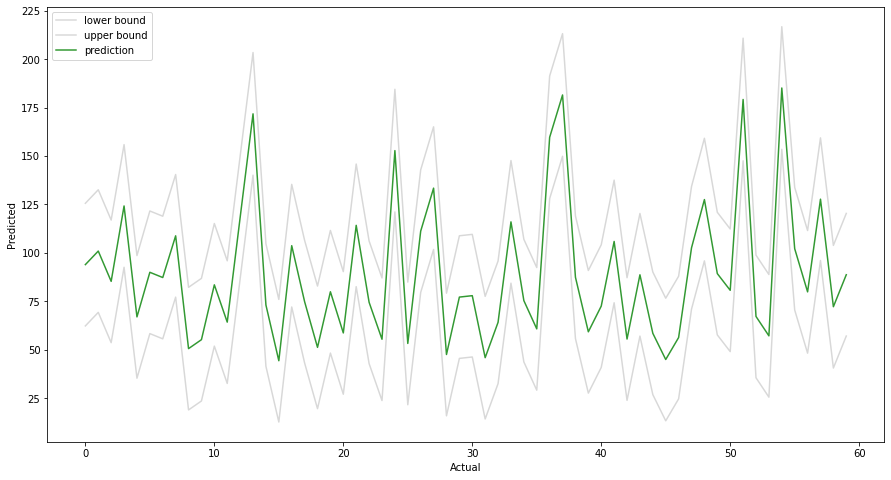

In [52]:
# Plotting the predicted and actual data 
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_rid,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

### Lasso Regression: (L1 Regularization)

([Contents:](#Contents:))

Lasso is a modification of linear regression, where the model is penalized for the sum of absolute values of the weights. Thus, the absolute values of weight will be (in general) reduced, and many will tend to be zeros. During training, the objective function become:

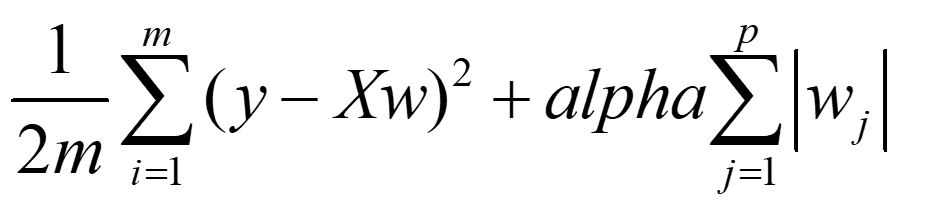

In [53]:
# Model training
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(x_train,y_train)
print("Training R2 score: "+ str(las.score(x_train,y_train)))

Training R2 score: 0.8429018756107678


In [54]:
# Predicting on the test and evaluating the accuracy
preds_las = ridge.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_las)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_las)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_las))))

Test R2 score: 0.8957756531572729
Test MAE: 9.611112958708553
Test RMSE: 12.70759395391315


In [55]:
pd.DataFrame(zip(las.coef_.T, x_train.columns))

,0,1
0,5.595149,PropertyType
1,-6.433378,ClubHouse
2,0.000000,School_University_in_Township
3,0.000000,Hospital_in_TownShip
4,0.000000,Mall_in_TownShip
5,0.000000,Park_Jogging_track
6,-0.000000,Swimming_Pool
7,-0.000000,Gym
8,0.084847,Property_Area_in_Sq_Ft
9,0.442135,Price_by_sub_area


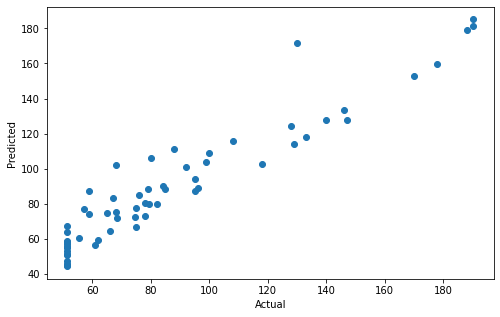

In [56]:
# Plotting the predicted and actual data 
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_las)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [57]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_las:
    lower, upper =  get_prediction_interval(i, y_train.values, las.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [58]:
print(lower_vet[:5])
print(upper_vet[:5])

[60.53348235980307, 67.5150706203604, 51.88554247582798, 90.80807629167182, 33.54294181636414]
[127.33794282205628, 134.31953108261362, 118.6900029380812, 157.61253675392504, 100.34740227861735]


In [59]:
preds_las.reshape(-1)

array([ 93.93571259, 100.91730085,  85.28777271, 124.21030652,
        66.94517205,  89.96622171,  87.26549064, 108.79085949,
        50.56718607,  55.18729439,  83.49577526,  64.24502684,
       118.19579919, 171.76004681,  73.07822912,  44.31877663,
       103.70378627,  74.78072203,  51.2130544 ,  79.91290877,
        58.66645824, 114.20081163,  74.47912972,  55.40189224,
       152.78137033,  53.24092013, 111.21133918, 133.40479722,
        47.52865327,  77.16639443,  77.89599068,  45.8991784 ,
        64.15023235, 115.99628824,  75.33613294,  60.76103895,
       159.6622562 , 181.49807116,  87.39886075,  59.25098256,
        72.50822513, 105.8839539 ,  55.51078372,  88.67103778,
        58.46440412,  44.94190776,  56.29003894, 102.59238204,
       127.50456579,  89.2932762 ,  80.66969252, 179.16998192,
        67.17113488,  57.16219978, 185.09846589, 102.14624075,
        79.86266753, 127.70573825,  72.19811986,  88.71045083])

In [60]:
df_las = pd.DataFrame(zip(lower_vet,upper_vet,preds_las.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_las.shape)
df_las.head()

(60, 3)


,lower,upper,mean
0,60.533482,127.337943,93.935713
1,67.515071,134.319531,100.917301
2,51.885542,118.690003,85.287773
3,90.808076,157.612537,124.210307
4,33.542942,100.347402,66.945172


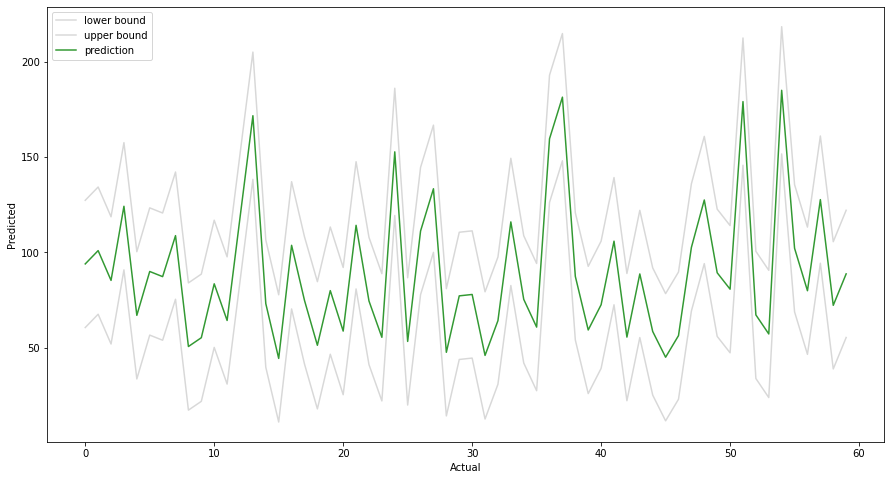

In [61]:
# Plotting the predicted and actual data 
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_las,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

## Ensemble:

([Contents:](#Contents:))

In [62]:
# Model training
from sklearn.ensemble import VotingRegressor

estimators = [('lr',linear_reg),('rid',ridge),('lasso',las)]
voting_ensemble = VotingRegressor(estimators,)
voting_ensemble.fit(x_train,y_train)
print("Training R2 score: "+ str(voting_ensemble.score(x_train,y_train)))

Training R2 score: 0.8573712880550022


In [64]:
# Predicting on the test and evaluating the accuracy
preds_vote = voting_ensemble.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_vote)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_vote)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_vote))))

Test R2 score: 0.9026061853165924
Test MAE: 9.172713148057566
Test RMSE: 12.284130641239525


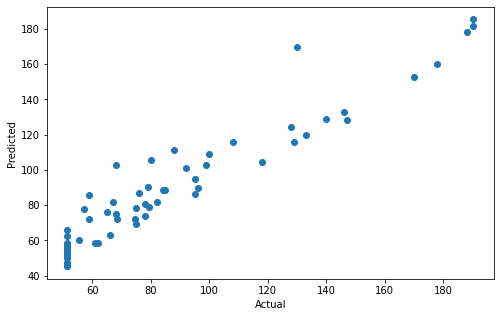

In [65]:
# Plotting the predicted and actual data 
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_vote)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [66]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_vote.reshape(-1,1):
    lower, upper =  get_prediction_interval(i, y_train.values, voting_ensemble.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [67]:
print(lower_vet[:5])
print(upper_vet[:5])

[62.75098470385112, 69.02722556230563, 55.14996549883965, 92.43199936190318, 37.67102425388342]
[126.40465362471696, 132.68089448317147, 118.80363441970549, 156.085668282769, 101.32469317474926]


In [68]:
preds_vote.reshape(-1)

array([ 94.57781916, 100.85406002,  86.97679996, 124.25883382,
        69.49785871,  88.57763104,  86.10344868, 109.18077509,
        50.15460332,  53.70323346,  81.92465719,  62.8436196 ,
       119.54391581, 169.3822749 ,  73.66539994,  45.28075941,
       102.76947661,  75.97724645,  51.66767375,  81.93510505,
        58.61718793, 115.73954346,  72.33546503,  54.39259617,
       152.9235517 ,  52.17717256, 111.41840094, 133.00244009,
        47.51138979,  77.58699265,  78.68262547,  46.97722845,
        62.66349364, 115.79623095,  74.89235776,  60.31717617,
       160.02984268, 181.48160731,  85.58843024,  58.60862127,
        72.10213311, 105.79071814,  55.94604927,  88.40542722,
        56.94826079,  45.56834961,  58.49948514, 104.2437017 ,
       128.55663384,  89.84881686,  80.6297288 , 177.90940161,
        65.86553716,  56.49181479, 185.33185289, 102.74783383,
        79.2533215 , 128.80990756,  72.34484032,  90.52981266])

In [69]:
df_vote = pd.DataFrame(zip(lower_vet,upper_vet,preds_vote.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_vote.shape)
df_vote.head()

(60, 3)


,lower,upper,mean
0,62.750985,126.404654,94.577819
1,69.027226,132.680894,100.854060
2,55.149965,118.803634,86.976800
3,92.431999,156.085668,124.258834
4,37.671024,101.324693,69.497859


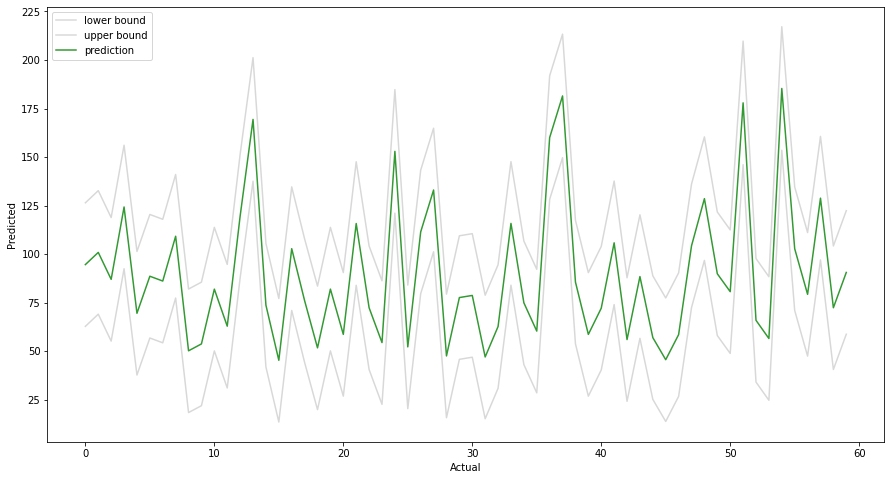

In [70]:
# Plotting the predicted and actual data 
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_vote,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

In [71]:
# Getting the interval estimate for future test usage
interval_est = get_interval_estimate(y_train.values, voting_ensemble.predict(x_train).reshape(-1,1))
print(interval_est)

# import pickle
# fileName = '../model/interval_est.pkl'
# with open(fileName,'wb') as f:
#     pickle.dump(interval_est,f)

31.82683446043292


## Saving the final trained model:

([Contents:](#Contents:))

In [46]:
import joblib

fileName = '../model/property_price_prediction_voting.sav'
joblib.dump(voting_ensemble,fileName)

['../model/property_price_prediction_voting.sav']

In [74]:
# load the model from disk
import joblib
fileName = '../model/property_price_prediction_voting.sav'
loaded_model = joblib.load(fileName)
print(loaded_model)

VotingRegressor(estimators=[('lr', LinearRegression()), ('rid', Ridge()),
                            ('lasso', Lasso())])


In [75]:
# features on which the model was trained
loaded_model.feature_names_in_

array(['PropertyType', 'ClubHouse', 'School_University_in_Township',
       'Hospital_in_TownShip', 'Mall_in_TownShip', 'Park_Jogging_track',
       'Swimming_Pool', 'Gym', 'Property_Area_in_Sq_Ft',
       'Price_by_sub_area', 'Amenities_score', 'Price_by_Amenities_score',
       'Noun_Counts', 'Verb_Counts', 'Adjective_Counts', 'boasts_elegant',
       'elegant_towers', 'every_day', 'great_community', 'mantra_gold',
       'offering_bedroom', 'quality_specification', 'stories_offering',
       'towers_stories', 'world_class'], dtype=object)

In [76]:
# testing it on the test data
result = loaded_model.score(x_test, y_test)
print(result)

0.9026061853165924
